In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.table import QTable

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (9, 6)

In [3]:
pyirf_file = '../build/pyirf.fits.gz' 

sensitivity = QTable.read(pyirf_file, hdu='SENSITIVITY')[1:-1]

# make it print nice
sensitivity['reco_energy_low'].info.format = '.3g'
sensitivity['reco_energy_high'].info.format = '.3g'
sensitivity['reco_energy_center'].info.format = '.3g'
sensitivity['relative_sensitivity'].info.format = '.2g'
sensitivity['flux_sensitivity'].info.format = '.3g'

for k in filter(lambda k: k.startswith('n_'), sensitivity.colnames):
    sensitivity[k].info.format = '.1f'

sensitivity

reco_energy_low,reco_energy_high,reco_energy_center,n_signal,n_signal_weighted,n_background,n_background_weighted,n_electron,n_electron_weighted,n_proton,n_proton_weighted,significance,relative_sensitivity,flux_sensitivity
TeV,TeV,TeV,,,,,,,,,,,1 / (cm2 s TeV)
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.0158,0.0251,0.0205,nan,nan,0.0,0.0,0.0,0.0,0.0,0.0,nan,inf,inf
0.0251,0.0398,0.0325,185.8,589.5,143.4,56786.3,95.2,1953.8,48.1,54832.4,5.000000000000784,0.25,5.6e-08
0.0398,0.0631,0.0515,408.0,883.1,473.1,88312.6,397.3,5176.0,75.8,83136.6,6.008259999630065,0.13,8.93e-09
0.0631,0.1,0.0815,400.8,650.0,654.5,65001.8,591.3,4471.3,63.2,60530.5,5.154661611818207,0.05,1e-09
0.1,0.158,0.129,419.5,571.9,1023.8,53411.3,961.5,5342.5,62.3,48068.8,5.0000000000004885,0.023,1.4e-10
0.158,0.251,0.205,434.7,466.5,1045.9,35364.5,998.3,3820.1,47.6,31544.4,5.000000000000796,0.019,3.5e-11
0.251,0.398,0.325,256.7,210.1,444.9,6957.3,434.0,1008.5,10.9,5948.9,5.000000000000045,0.017,9.24e-12
0.398,0.631,0.515,264.2,165.1,321.6,4227.1,314.0,470.6,7.6,3756.5,5.00000000000054,0.021,3.42e-12


In [4]:
sensitivity_unop = QTable.read(pyirf_file, hdu='SENSITIVITY_UNOP')[1:-1]

In [5]:
magic = QTable.read('magic_sensitivity_2014.ecsv')

for k in filter(lambda k: k.startswith('sensitivity_') or k.startswith('e_'), magic.colnames):
    magic[k].info.format = '.3g'

magic

e_max,e_min,background_rate,background_rate_err,gamma_rate,gamma_rate_err,sensitivity_lima_1off,sensitivity_lima_1off_err,sensitivity_lima_3off,sensitivity_lima_3off_err,sensitivity_lima_5off,sensitivity_lima_5off_err,sensitivity_snr,sensitivity_snr_err,e_center,e_err_lo,e_err_hi
GeV,GeV,1 / min,1 / min,1 / min,1 / min,1 / (cm2 s TeV),1 / (cm2 s TeV),1 / (cm2 s TeV),1 / (cm2 s TeV),1 / (cm2 s TeV),1 / (cm2 s TeV),1 / (cm2 s TeV),1 / (cm2 s TeV),GeV,GeV,GeV
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
100,63,4.06,0.08,3.01,0.13,7.6e-10,3.46e-11,6.13e-10,2.59e-11,5.87e-10,2.59e-11,7.3e-10,3e-11,79.4,16.4,20.6
158,100,2.41,0.06,4.29,0.12,1.65e-10,4.85e-12,1.34e-10,3.81e-12,1.27e-10,3.46e-12,1.37e-10,5e-12,126,25.7,32.3
251,158,0.54,0.03,3.37,0.08,3.91e-11,1.33e-12,3.15e-11,1.06e-12,2.98e-11,1.06e-12,3.05e-11,1.3e-12,199,41.1,51.9
398,251,0.066,0.01,1.36,0.05,1.35e-11,9.68e-13,1.05e-11,7.74e-13,9.82e-12,7.26e-13,9.3e-12,8e-13,316,65.1,81.9
631,398,0.027,0.006,1.22,0.04,3.56e-12,3.05e-13,2.73e-12,3.05e-13,2.56e-12,2.54e-13,2.3e-12,3e-13,501,103,130
1e+03,631,0.0133,0.0018,0.88,0.04,1.24e-12,6.81e-14,9.3e-13,5.11e-14,8.68e-13,6.24e-14,7.2e-13,6e-14,794,163,206
1.58e+03,1e+03,0.0059,0.0007,0.58,0.03,4.51e-13,2e-14,3.27e-13,1.64e-14,3.02e-13,1.64e-14,2.3e-13,1.8e-14,1.26e+03,259,326
2.51e+03,1.58e+03,0.0027,0.0005,0.3,0.02,2.12e-13,1.12e-14,1.45e-13,1.06e-14,1.32e-13,1e-14,9e-14,1e-14,2e+03,410,517


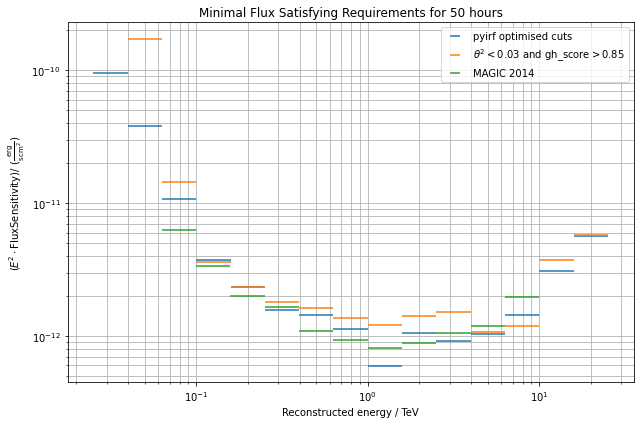

In [6]:
unit = u.Unit('erg cm-2 s-1')

for s, label in zip(
    [sensitivity, sensitivity_unop], 
    ['pyirf optimised cuts', r'$\theta^2 < 0.03$ and gh_score$> 0.85$']
):
    e = s['reco_energy_center']
    w = (s['reco_energy_high'] - s['reco_energy_low'])
    s = (e**2 * s['flux_sensitivity'])

    plt.errorbar(
        e.to_value(u.TeV),
        s.to_value(unit),
        xerr=w.to_value(u.TeV) / 2,
        ls='',
        label=label
    )

e_magic = .5 * (magic['e_max'].to(u.TeV) + magic['e_min'].to(u.TeV))
w_magic = (magic['e_max'].to(u.TeV) - magic['e_min'].to(u.TeV))
s_magic = (e_magic**2 * magic['sensitivity_lima_5off'])

plt.errorbar(
    e_magic.to_value(u.TeV),
    s_magic.to_value(unit),
    xerr=w_magic.to_value(u.TeV) / 2,
    ls='',
    label='MAGIC 2014'
)

plt.title('Minimal Flux Satisfying Requirements for 50 hours')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Reconstructed energy / TeV")
plt.ylabel(rf"$(E^2 \cdot \mathrm{{Flux Sensitivity}}) /$ ({unit.to_string('latex')})")

plt.grid(which='both')
plt.legend()
plt.tight_layout()

None

## Plot crab observation sensitivity

In [7]:
crab_sensitivity_file = '../build/sensitivity_crab.fits.gz' 

sensitivity_crab = QTable.read(crab_sensitivity_file, hdu='SENSITIVITY')[1:-1]
sensitivity_crab_unop = QTable.read(crab_sensitivity_file, hdu='SENSITIVITY_UNOP')[1:-1]

sensitivity_crab

reco_energy_low,reco_energy_high,reco_energy_center,n_signal,n_signal_weighted,n_background,n_background_weighted,significance,relative_sensitivity,flux_sensitivity
TeV,TeV,TeV,,,,,,,1 / (cm2 s TeV)
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.015848931924611134,0.025118864315095794,0.020483898119853464,nan,nan,0.0,0.0,nan,inf,inf
0.025118864315095794,0.03981071705534971,0.032464790685222754,137.9102894490288,566.3936045972946,12752.16256037751,52372.76600491725,5.000000000000227,0.027648414083606417,6.216638733437767e-09
0.03981071705534971,0.0630957344480193,0.05145322575168451,192.61878885444855,791.0798430511354,19261.878885465427,79107.98430511354,5.686533685458055,0.024892580622182546,1.6747705955204952e-09
0.0630957344480193,0.09999999999999995,0.08154786722400963,93.3088782699619,383.21688769861765,5779.888080918777,23737.834627079323,4.999999999999909,0.023373967502495464,4.705630701978814e-10
0.09999999999999995,0.15848931924611126,0.1292446596230556,54.55485985337881,224.05524521857086,1932.860201972581,7938.201430432403,4.999999999999813,0.01651176145683378,9.946695216753462e-11
0.15848931924611126,0.25118864315095785,0.20483898119853455,38.18206286210644,156.8126374169451,925.3736299944518,3800.4829660295404,5.000000000000921,0.011545830922923024,2.0811845742646375e-11
0.25118864315095785,0.3981071705534969,0.3246479068522274,13.81085398713693,56.720781339780004,105.35970543080985,432.7092893274252,4.999999999999979,0.01151864385916341,6.2127911639193625e-12
0.3981071705534969,0.6309573444801927,0.5145322575168448,9.613815271395854,39.4836636719035,46.18885896556997,189.6963194431175,5.000000000000005,0.009509213918294613,1.534723072478923e-12


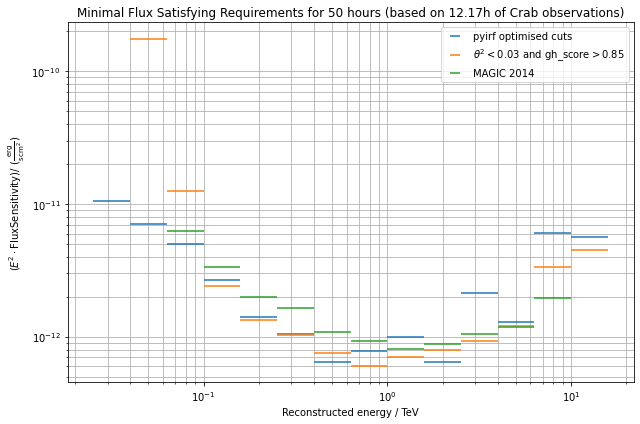

In [8]:
unit = u.Unit('erg cm-2 s-1')

for s, label in zip(
    [sensitivity_crab, sensitivity_crab_unop], 
    ['pyirf optimised cuts', r'$\theta^2 < 0.03$ and gh_score$> 0.85$']
):
    e = s['reco_energy_center']
    w = (s['reco_energy_high'] - s['reco_energy_low'])
    s = (e**2 * s['flux_sensitivity'])

    plt.errorbar(
        e.to_value(u.TeV),
        s.to_value(unit),
        xerr=w.to_value(u.TeV) / 2,
        ls='',
        label=label
    )

e_magic = .5 * (magic['e_max'].to(u.TeV) + magic['e_min'].to(u.TeV))
w_magic = (magic['e_max'].to(u.TeV) - magic['e_min'].to(u.TeV))
s_magic = (e_magic**2 * magic['sensitivity_lima_5off'])

plt.errorbar(
    e_magic.to_value(u.TeV),
    s_magic.to_value(unit),
    xerr=w_magic.to_value(u.TeV) / 2,
    ls='',
    label='MAGIC 2014'
)

plt.title('Minimal Flux Satisfying Requirements for 50 hours (based on 12.17h of Crab observations)')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Reconstructed energy / TeV")
plt.ylabel(rf"$(E^2 \cdot \mathrm{{Flux Sensitivity}}) /$ ({unit.to_string('latex')})")

plt.grid(which='both')
plt.legend()
plt.tight_layout()

None